In [128]:
import pandas as pd

# Define the file path

file_path = "C:/Users/Lenovo/OneDrive/Bureau/Demandforecast/cleaned_demand_forecast.csv"

# Read the CSV file into a DataFrame

df = pd.read_csv(file_path)

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119317 entries, 0 to 2119316
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   start_station_name  object 
 1   end_station_name    object 
 2   started_at_day      object 
 3   started_at_hour     int64  
 4   duration_mins       float64
 5   distance            float64
 6   distance_category   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 113.2+ MB


In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in  df.columns:
    if(df[c].dtype=='object'):
        df[c]=le.fit_transform(df[c])
    else:
        df[c]=df[c]
        
df.head(3)    


,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category
0,147,150,3,12,8.0,1938.471532,1.0
1,223,495,0,19,29.0,2235.093936,2.0
2,147,495,1,15,38.0,6266.008490,6.0


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_scaled = df[['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category']]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled[['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category']])

df_scaled_fit = pd.DataFrame(df_scaled_fit, columns=['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category'])

In [132]:
from scipy.stats import zscore
import numpy as np
z_scores = np.abs(zscore(df_scaled_fit))
z_scores

,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category
0,1.119887,1.105126,0.052500,0.490749,0.083708,0.455357,0.676700
1,0.788042,0.421964,1.506084,0.896573,0.011400,0.302111,0.164263
2,1.119887,0.421964,0.986556,0.103818,0.052161,1.780418,1.885485
3,1.482476,0.063430,1.611083,0.500195,0.070121,0.340434,0.164263
4,1.482476,0.421964,0.467028,0.302006,0.020303,0.997492,1.189137
...,...,...,...,...,...,...,...
2119312,1.207394,0.399832,0.052500,0.887126,0.301255,1.154474,1.189137
2119313,0.521693,0.386553,1.506084,0.698384,0.083708,0.529050,0.676700
2119314,0.530426,0.386553,0.572027,1.292950,0.020303,0.489213,0.348174
2119315,1.264157,0.386553,0.467028,0.103818,0.015774,0.239555,0.348174


In [133]:
df_scaled = df_scaled_fit[(z_scores < 3).all(axis=1)]


Text(0.5, 1.0, 'Correlation between different fearures')

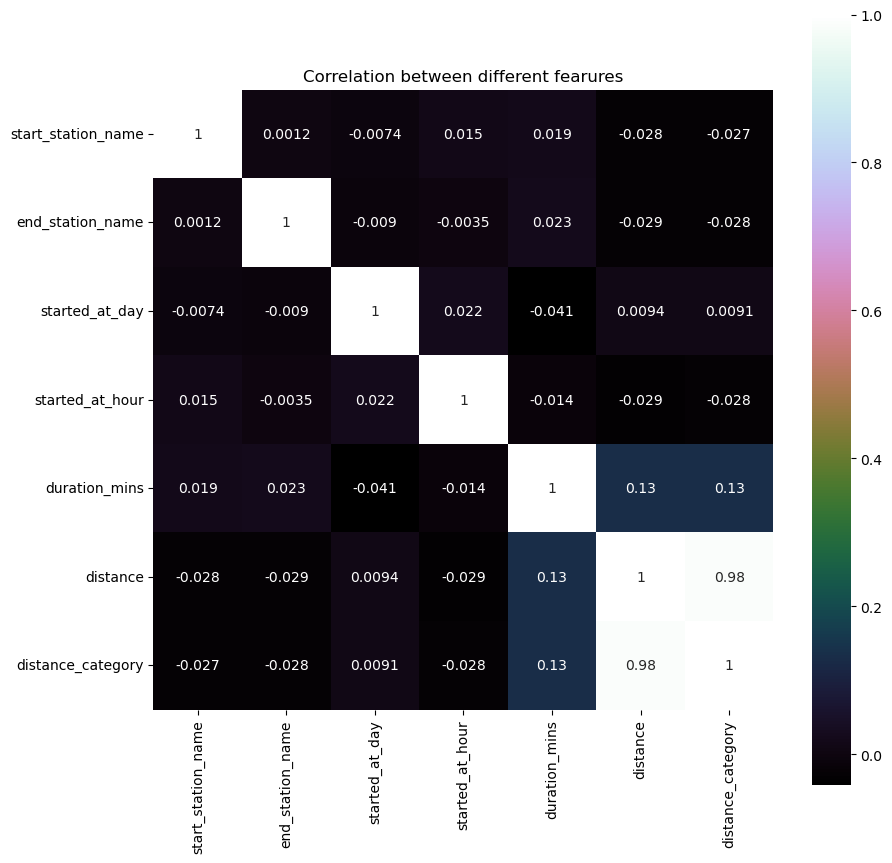

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [200]:
df.head()

,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category,Label
0,147,150,3,12,8.0,1938.471532,1.0,3.0
1,223,495,0,19,29.0,2235.093936,2.0,0.0
2,147,495,1,15,38.0,6266.008490,6.0,4.0
3,743,414,6,17,11.0,2160.916763,2.0,1.0
4,743,495,2,16,22.0,889.123671,0.0,2.0


In [201]:
df.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'duration_mins', 'distance', 'distance_category',
       'Label'],
      dtype='object')

In [137]:
var_list=df_scaled[["start_station_name","started_at_day","distance_category"]]

In [138]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [139]:
kmeans.labels_


array([2, 1, 0, ..., 2, 3, 3])

In [140]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)
    
    ssd.append(kmeans.inertia_)
ssd

[5579472.052074567,
 3958877.876449696,
 3006399.309104861,
 2452224.8895188775,
 1951154.9492435635,
 1801919.3344636613,
 1598716.8059918971,
 1444481.5767614266,
 1354608.1447214303,
 1284140.910683006]

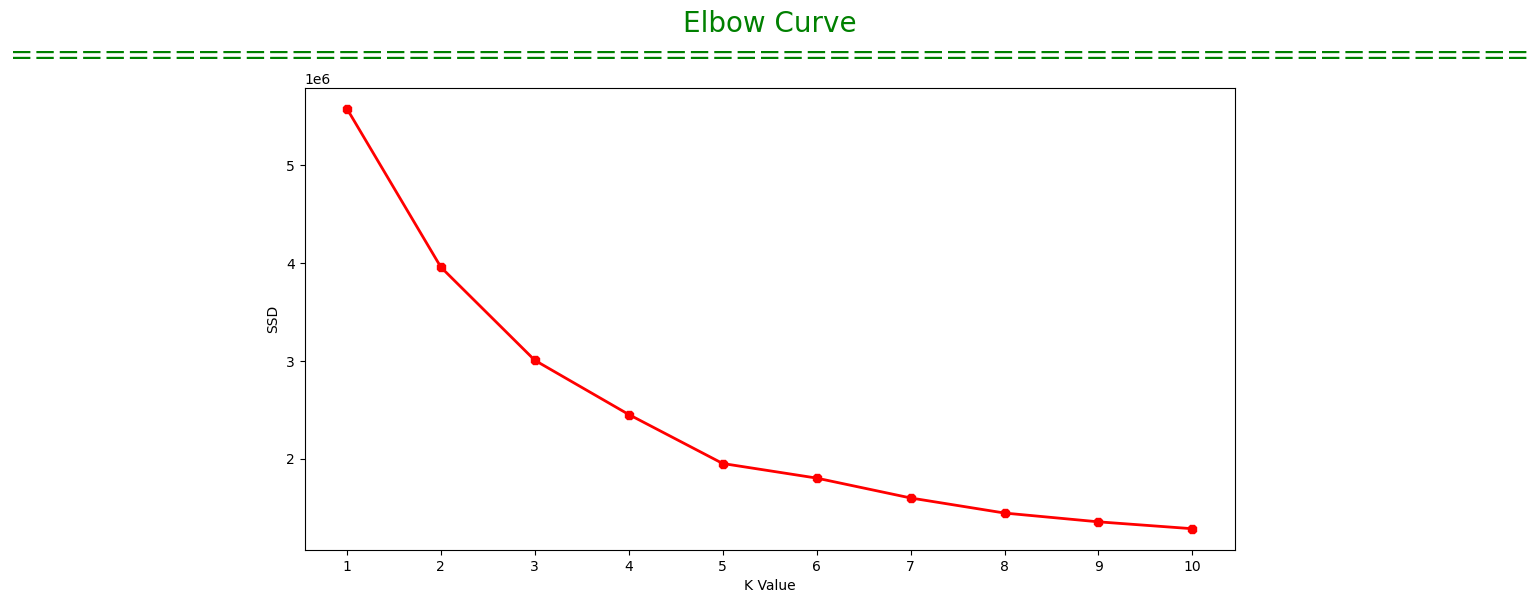

In [141]:
import numpy as np
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

Conclusion - From the above Elbow curve we will take the value of K=5 and rebuild the cluster.

In [142]:
# K=5

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [143]:
kmeans.labels_


array([3, 0, 4, ..., 3, 2, 2])

In [144]:
df_scaled["Label"] = kmeans.labels_
df = pd.concat([df, df_scaled['Label']], axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\984729274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled["Label"] = kmeans.labels_


Text(0.5, 1.0, 'Correlation between different fearures')

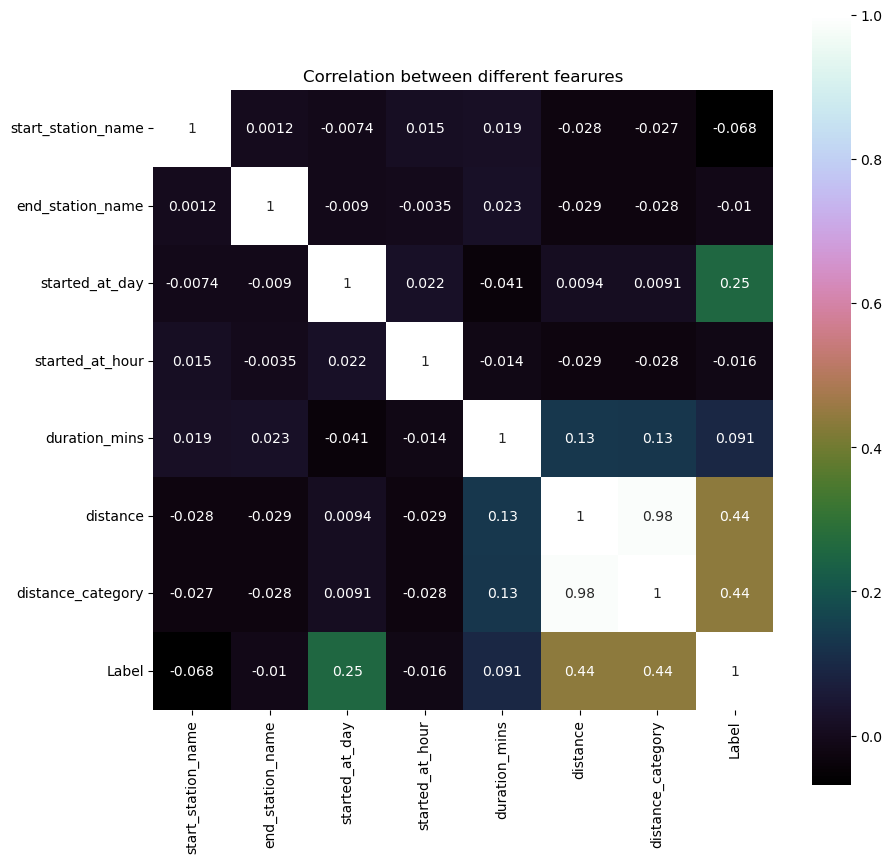

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [146]:
df_scaled.head()


,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category,Label
0,-1.119887,-1.105126,0.052500,-0.490749,-0.083708,-0.455357,-0.676700,3
1,-0.788042,0.421964,-1.506084,0.896573,0.011400,-0.302111,-0.164263,0
2,-1.119887,0.421964,-0.986556,0.103818,0.052161,1.780418,1.885485,4
3,1.482476,0.063430,1.611083,0.500195,-0.070121,-0.340434,-0.164263,1
4,1.482476,0.421964,-0.467028,0.302006,-0.020303,-0.997492,-1.189137,2


In [147]:
df_scaled['Label'].value_counts()

Label
1    534026
3    463182
2    458019
0    386151
4    236241
Name: count, dtype: int64

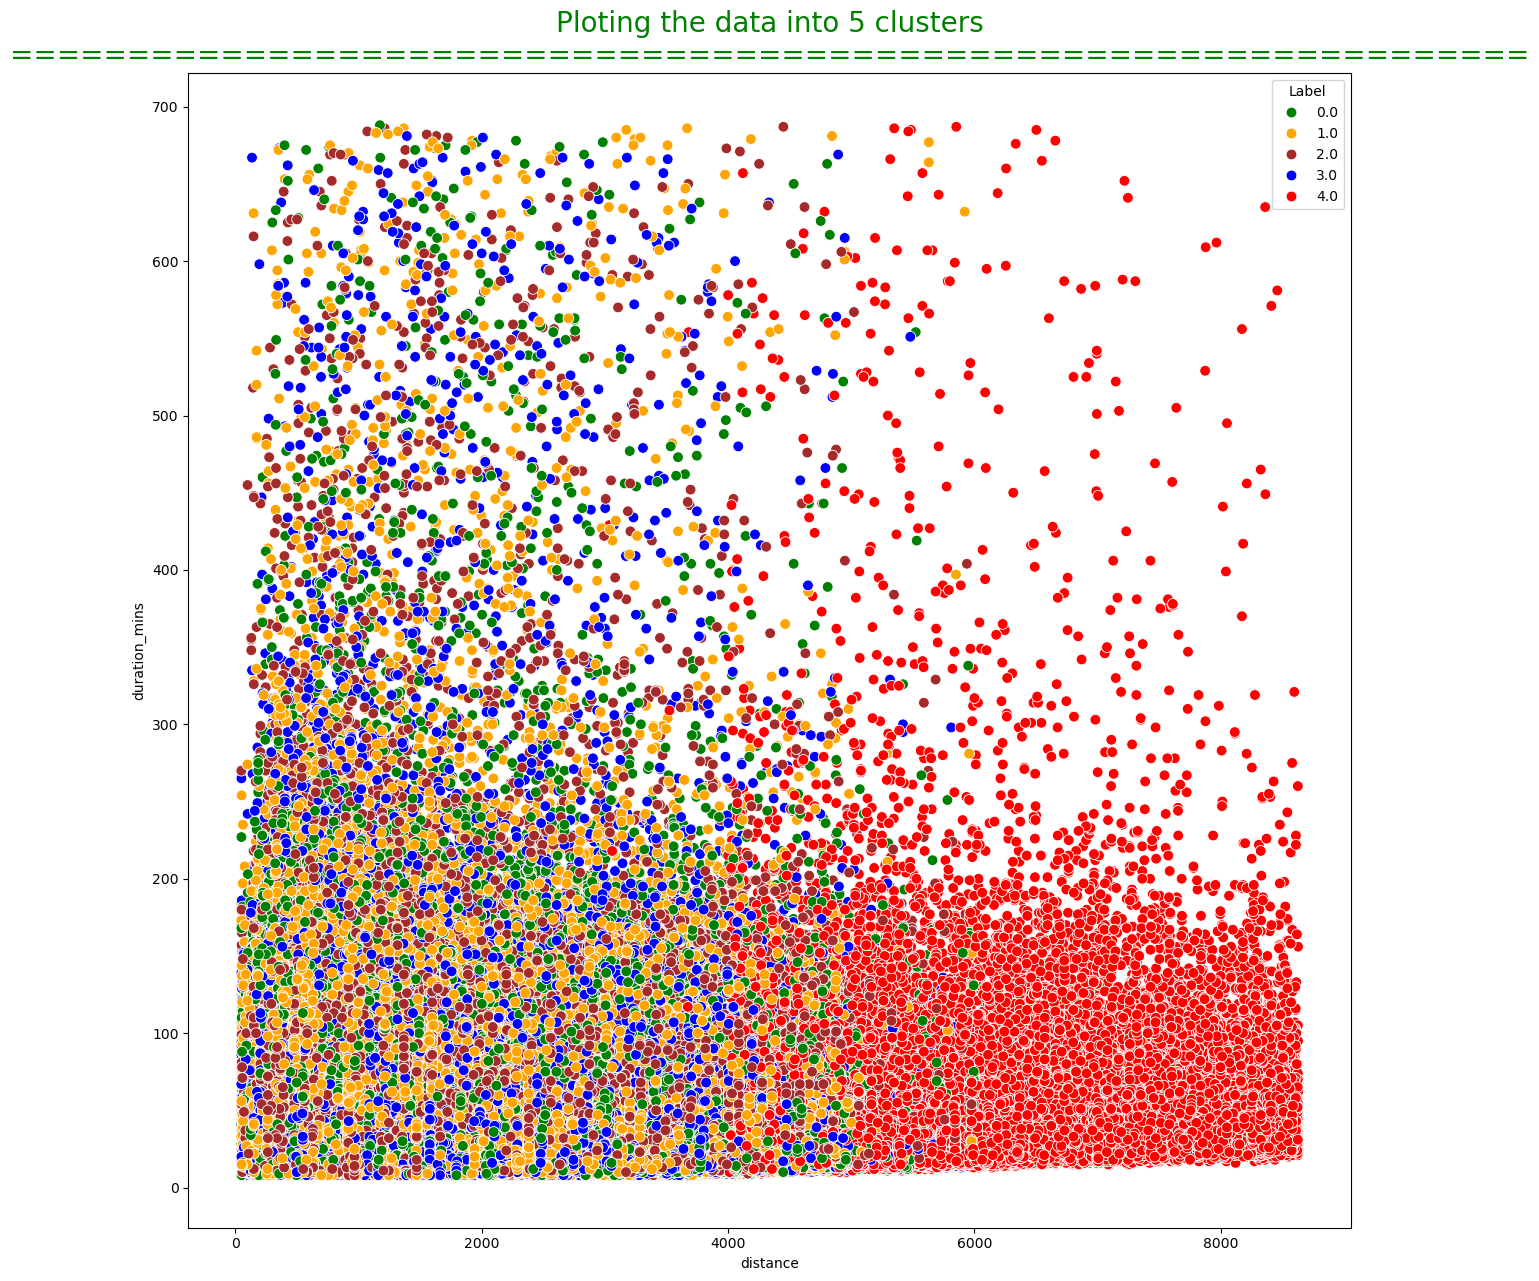

In [148]:
plt.figure(figsize=(15,15))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="distance", y="duration_mins", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\937841815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='duration_mins', data=df, palette="nipy_spectral_r")


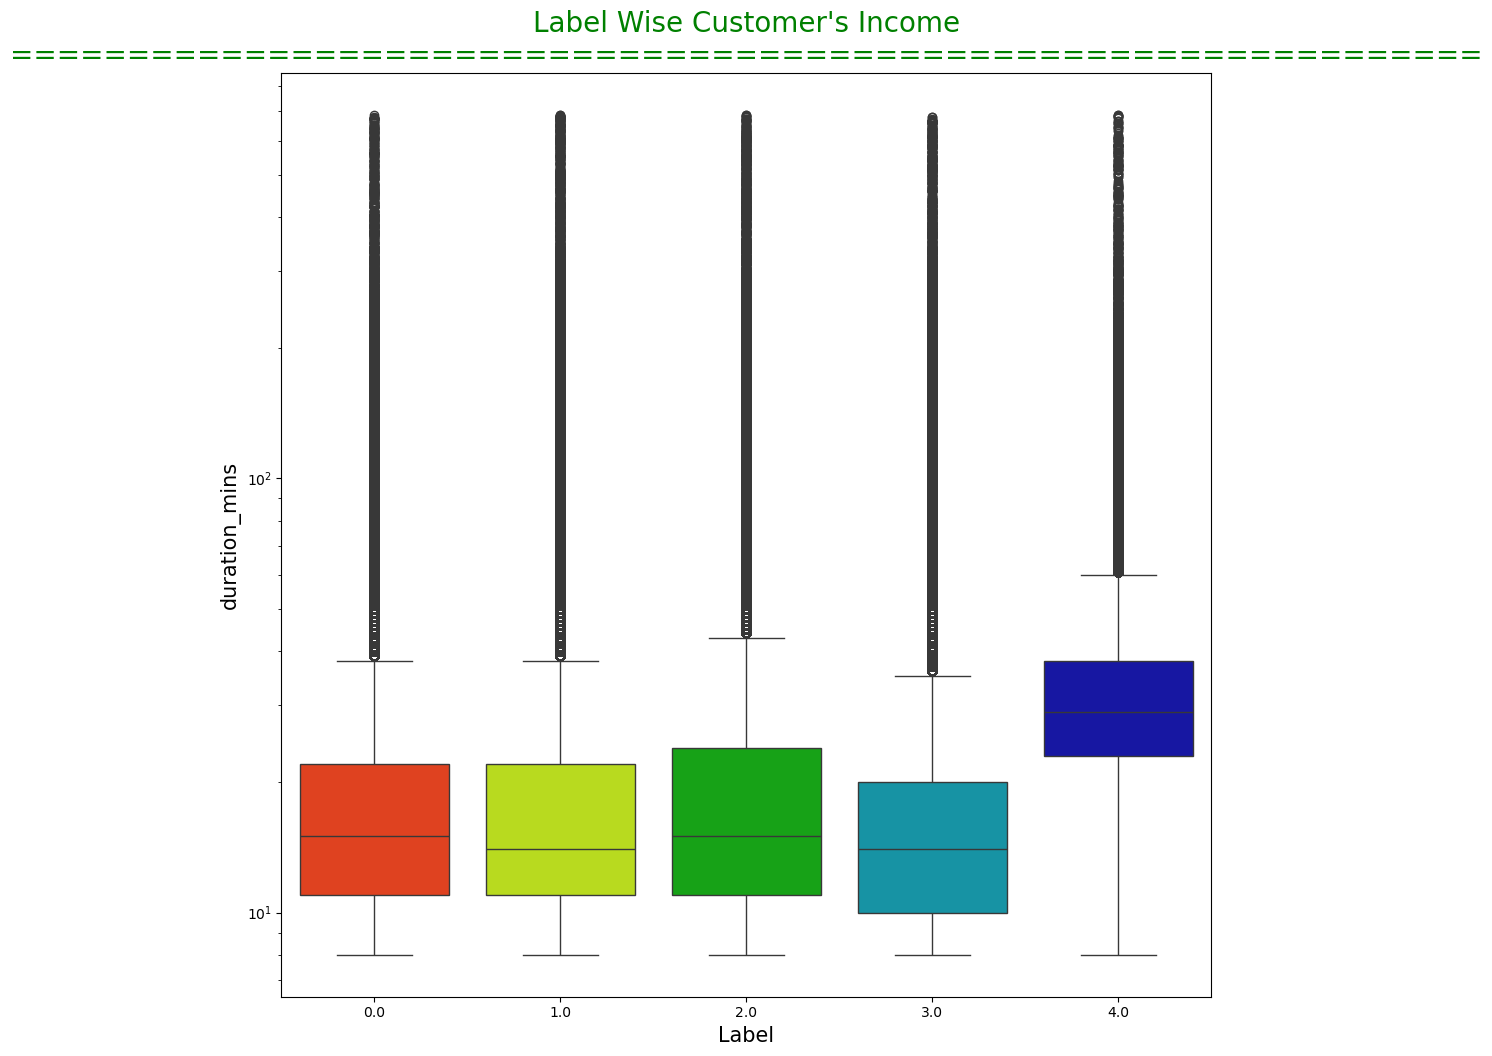

In [149]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Label', y='duration_mins', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.yscale('log')
plt.ylabel(ylabel="duration_mins",fontsize=15)
plt.show()

In [ ]:
df.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'duration_mins', 'distance', 'distance_category',
       'Label'],
      dtype='object')

In [295]:
df_scaled=df_scaled.drop(columns=['start_station_name', 'end_station_name', 'distance_category'])

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df_scaled.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\3112207602.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['started_at_day'],color='green')


<Axes: xlabel='started_at_day', ylabel='Density'>

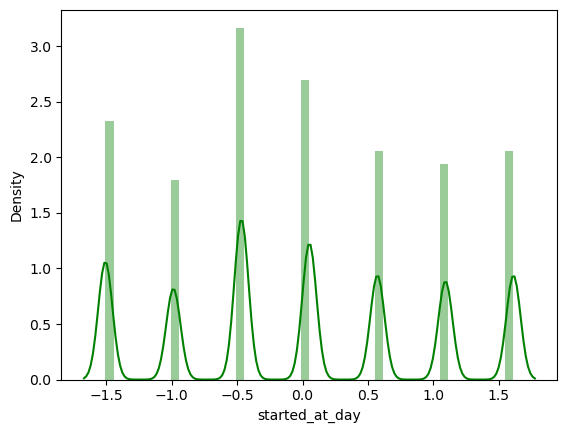

In [331]:
sns.distplot(df_scaled['started_at_day'],color='green')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\1068112564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['distance'],color='green')


<Axes: xlabel='distance', ylabel='Density'>

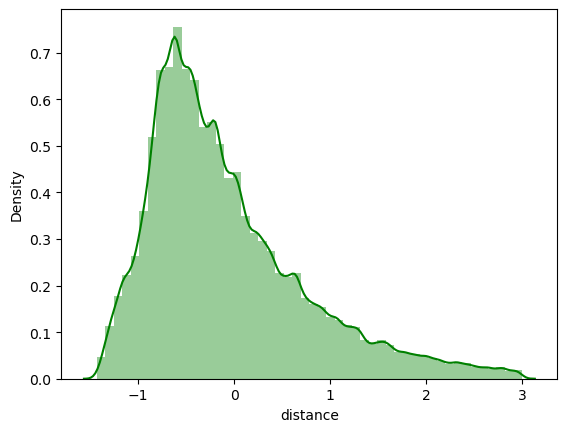

In [332]:
sns.distplot(df_scaled['distance'],color='green')


In [296]:
df_scaled.to_csv('data_clustered.csv', index=False)

In [343]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
x=df_scaled.drop(columns=['Label','started_at_hour'] ,axis=1)
y=df_scaled["Label"]

In [339]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)


In [345]:

from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

models = [LinearRegression(),  Lasso(), 
          RandomForestRegressor(), Ridge()] 

for i in range(4): 
    models[i].fit(xtrain, ytrain) 
  
    print(f'{models[i]} : ') 
  
    y_pred = models[i].predict(xtrain) 
    print('Training Error : ', mae(ytrain, y_pred)) 
  
    y_pred = models[i].predict(xtest) 
    print('Validation Error : ', mae(ytest, y_pred))
    kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    y_pred = kbins.fit_transform(y_pred.reshape(-1, 1)).astype(int).ravel()
    accuracy = accuracy_score(ytest, y_pred)

    print(f"Accuracy: {accuracy}")
    print() 

LinearRegression() : 
Training Error :  0.996774985128786
Validation Error :  0.9966109358774085
Accuracy: 0.25769389975067625

Lasso() : 
Training Error :  1.0992052309617613


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


Validation Error :  1.100340930162145
Accuracy: 0.18610557593143437

RandomForestRegressor() : 
Training Error :  0.2900527302679459
Validation Error :  0.6287855157824733
Accuracy: 0.27571772829808466

Ridge() : 
Training Error :  0.9967750614553839
Validation Error :  0.9966110094086447


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Accuracy: 0.2576971085504889



Based on the errors you’ve shared, RandomForestRegressor seems to have the lowest training error, but it also shows signs of overfitting due to the higher validation error. On the other hand, LinearRegression and Ridge have very similar and balanced training and validation errors, indicating good generalization.

In [327]:
y_test_list = list(ytest)


The predictions made by the RandomForestRegressor are really amazing compared to the other model. In the case of RandomForestRegressor, there is a little bit of overfitting but we can manage it by hyperparameter tuning.

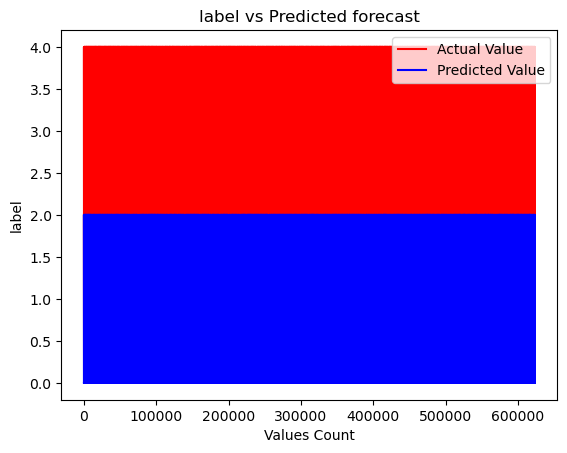

In [346]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('label vs Predicted forecast')
plt.xlabel('Values Count')
plt.ylabel('label')
plt.legend()
plt.show()

In [348]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_pred = kbins.fit_transform(y_pred.reshape(-1, 1)).astype(int).ravel()
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")


Mean Squared Error: 0.9918142375300646
Accuracy: 0.4013855597590833


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Low MSE

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError

In [46]:
# Convert the Pandas DataFrame to a TensorFlow constant

tensor_data = tf.constant(df_scaled.values, dtype=tf.float32)
tensor_data.shape

TensorShape([2077619, 8])

In [47]:
tensor_data


<tf.Tensor: shape=(2077619, 8), dtype=float32, numpy=
array([[-1.1198874 , -1.1051255 ,  0.05249952, ..., -0.45535746,
        -0.6767001 ,  2.        ],
       [-0.78804237,  0.4219639 , -1.5060841 , ..., -0.3021107 ,
        -0.16426311,  2.        ],
       [-1.1198874 ,  0.4219639 , -0.98655623, ...,  1.7804178 ,
         1.8854848 ,  0.        ],
       ...,
       [-0.5304259 ,  0.38655314,  0.5720274 , ...,  0.48921266,
         0.34817386,  3.        ],
       [ 1.2641566 ,  0.38655314, -0.46702835, ...,  0.23955476,
         0.34817386,  1.        ],
       [ 1.6134671 ,  0.9575518 , -0.46702835, ...,  1.0312059 ,
         0.86061084,  1.        ]], dtype=float32)>

In [48]:
# Shuffle the dataset for randomness

tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(2077619, 8), dtype=float32, numpy=
array([[ 1.4650102 , -1.649566  ,  1.6110831 , ..., -0.07802357,
        -0.16426311,  4.        ],
       [ 1.3252859 , -1.36628   , -0.98655623, ...,  0.9638468 ,
         0.86061084,  1.        ],
       [-1.4648315 ,  0.01031371, -0.46702835, ...,  1.895581  ,
         1.8854848 ,  0.        ],
       ...,
       [ 0.5786348 , -0.8970873 , -0.46702835, ..., -0.16546367,
        -0.16426311,  1.        ],
       [ 0.07650103,  0.01916641,  0.05249952, ..., -0.16243258,
        -0.16426311,  1.        ],
       [ 1.4650102 ,  0.4308166 ,  1.6110831 , ..., -0.10947872,
        -0.16426311,  4.        ]], dtype=float32)>

In [49]:
# Separate features (X) and labels (Y)
X = tensor_data[:, 3:-1]  # Features
Y = tensor_data[:, -1]  # Labels

# Expand dimensions of Y to match model input requirements
Y = tf.expand_dims(Y, axis=-1)

In [53]:
# Define data split ratios
Train_Ratio = 0.8
Validation_Ratio = 0.1
Test_Ratio = 0.1

# Calculate the dataset size
Dataset_Size = len(X)

# Split the data into training, validation, and test sets
X_train = X[:int(Dataset_Size * Train_Ratio)]
Y_train = Y[:int(Dataset_Size * Train_Ratio)]

X_Val = X[int(Dataset_Size * Train_Ratio):int(Dataset_Size * (Train_Ratio + Validation_Ratio))]
Y_Val = Y[int(Dataset_Size * Train_Ratio):int(Dataset_Size * (Train_Ratio + Validation_Ratio))]

X_Test = X[int(Dataset_Size * (Train_Ratio + Validation_Ratio)):]
Y_Test = Y[int(Dataset_Size * (Train_Ratio + Validation_Ratio)):]

print(f'Train set: {X_train.shape}, {Y_train.shape}')
print(f'Validation set: {X_Val.shape}, {Y_Val.shape}')
print(f'Test set: {X_Test.shape}, {Y_Test.shape}')

Train set: (1662095, 4), (1662095, 1)
Validation set: (207762, 4), (207762, 1)
Test set: (207762, 4), (207762, 1)


In [54]:
# Normalize the training data
normalizer = Normalization()
normalizer.adapt(X_train)

# Display normalized data
print(normalizer(X_train)[:5])

tf.Tensor(
[[ 1.0904728e+00 -4.8804912e-01 -1.2890903e-03 -1.0649574e-01]
 [ 1.0904728e+00  4.7637472e-01  1.2659386e+00  1.1300756e+00]
 [-9.6940845e-02  3.9922079e-01  2.3992074e+00  2.3666470e+00]
 [ 4.9676606e-01 -4.1089523e-01 -5.3615868e-01 -7.2478139e-01]
 [ 4.9676606e-01 -4.8804912e-01 -5.7524943e-01 -7.2478139e-01]], shape=(5, 4), dtype=float32)


In [55]:
# Creating the model

from tensorflow.keras.optimizers import Adam  # Optimizer

# Creating the model
model = tf.keras.Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

# Summary of the model
model.summary()

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,714 (34.04 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 9 (40.00 B)

In [56]:
# Train the model

history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_Val, Y_Val))

Epoch 1/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 1.2928 - root_mean_squared_error: 1.1364 - val_loss: 1.2588 - val_root_mean_squared_error: 1.1219
Epoch 2/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 153s 3ms/step - loss: 1.2598 - root_mean_squared_error: 1.1224 - val_loss: 1.2569 - val_root_mean_squared_error: 1.1211
Epoch 3/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 1.2584 - root_mean_squared_error: 1.1218 - val_loss: 1.2564 - val_root_mean_squared_error: 1.1209
Epoch 4/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - loss: 1.2578 - root_mean_squared_error: 1.1215 - val_loss: 1.2553 - val_root_mean_squared_error: 1.1204
Epoch 5/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 1.2578 - root_mean_squared_error: 1.1215 - val_loss: 1.2572 - val_root_mean_squared_error: 1.1212
Epoch 6/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 1.2572 - root_mean_squared_error: 1.1213 - val_loss: 1.2553 - val_root_mean_squared_error: 1.1204
Epoch 7/50
51941/519

In [ ]:
accuracy = model.evaluate(xtest, ytest)
print(f'Accuracy: {accuracy[1]}')

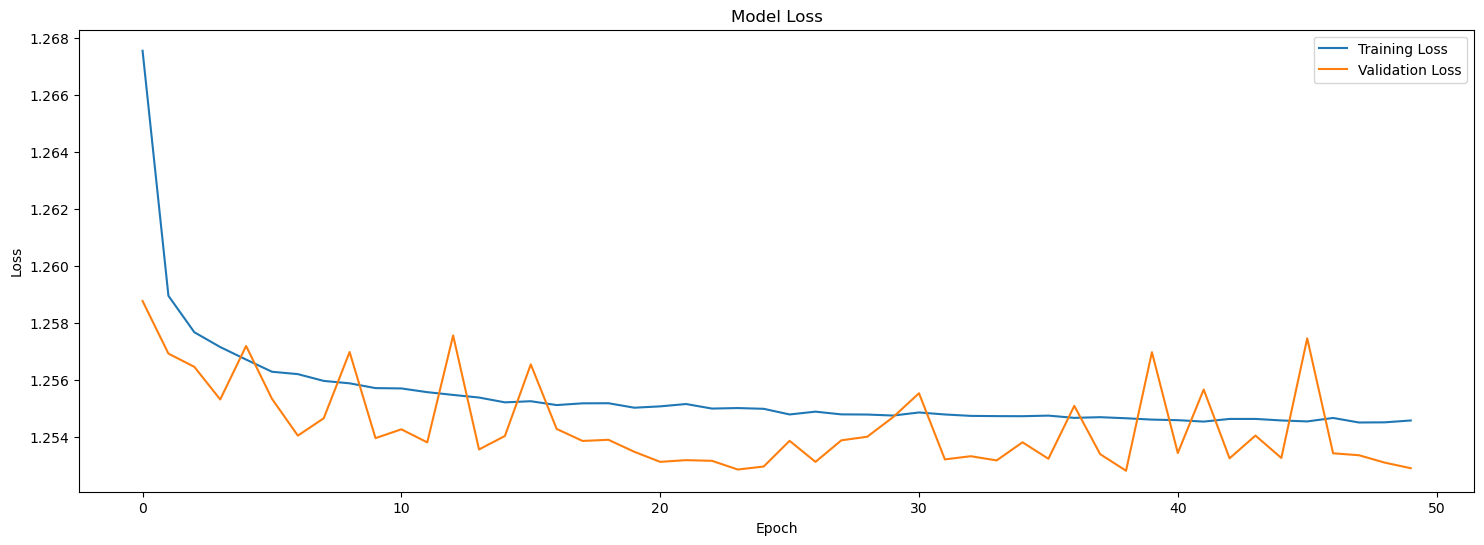

In [57]:
# Plot training & validation loss values

plt.figure(figsize=(18, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [58]:
# Evaluate the model on the test data
test_loss, test_rmse = model.evaluate(X_Test, Y_Test, verbose=0)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 1.119817852973938


In [67]:
baseline_pred = np.mean(y)
baseline_rmse = np.sqrt(mean_squared_error(y, [baseline_pred] * len(Y)))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 1.2832093916324534


In [66]:
#Making Predictions

predictions = model.predict(X_Test)

# Compare some predictions with actual values
comparison_df = pd.DataFrame({
    'label': Y_Test.numpy().flatten(),
    'Predicted': predictions.flatten()
})

comparison_df.head()

6493/6493 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


,Actual,Predicted
0,4.0,2.482939
1,2.0,2.403215
2,1.0,1.888425
3,1.0,2.267022
4,1.0,2.351269


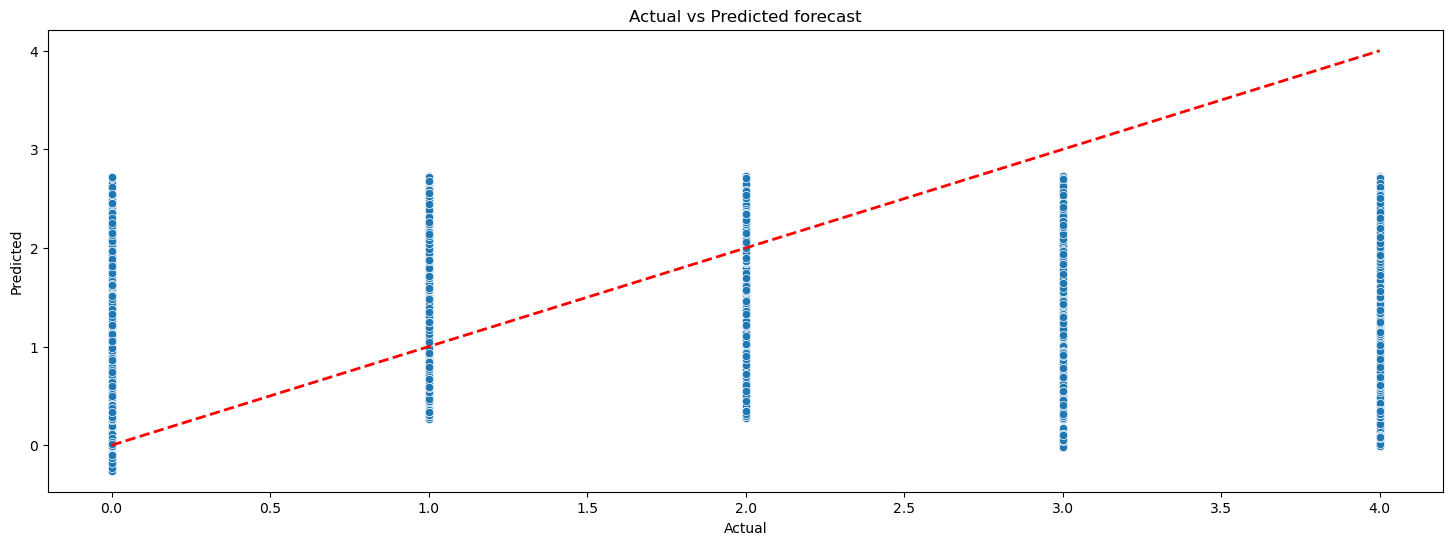

In [76]:
# Plot predictions vs actual
plt.figure(figsize=(18, 6))
sns.scatterplot(x='label', y='Predicted', data=comparison_df)
plt.plot([comparison_df['label'].min(), comparison_df['label'].max()],[comparison_df['Actual'].min(), comparison_df['Actual'].max()],'r--', lw=2)
plt.xlabel('label')
plt.ylabel('Predicted')
plt.title('label vs Predicted forecast')
plt.show()